In [1]:
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb_double")
from PDE2D.Coefficient import *
from PDE2D.utils import *
from matplotlib import pyplot as plt, patches
bbox = [[-2, -2],[2, 2]]
from mitsuba import Point2f, Float

In [2]:
image = np.array([[1,2,3],[4,5,6],[7,8,9]])
#coeff = GaussianMixtureCoefficient("test", mean = [[-0.2,0.8], [0.2, 0.3]], 
#                                   std = [[0.4,0.8], [2,0.9]], corr = [0.88, 0.99], 
#                                   power = [5,2] ,num_lobes = 2)
coeff = GaussianMixtureCoefficient("test", mean = [[-0.2,0.2],[-0.2, 0.2]], std = [[3,2], [4,2]], corr = [0.4, 0.3], power = [1, 1] ,num_lobes = 2)

In [3]:

resolution = [256, 256]
spp = 1024
fd_step = 1e-3
points = create_image_points(bbox, resolution, spp)

Text(0.5, 1.0, 'FNC')

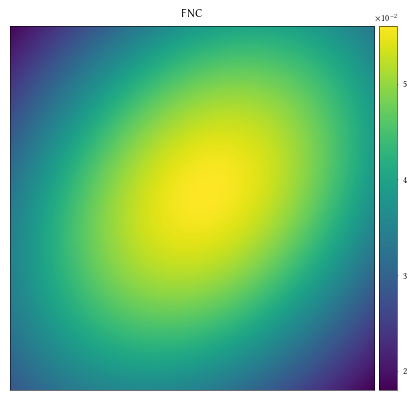

In [5]:

fnc_vals = coeff.get_value(points)
image_, tensor_ = create_image_from_result(fnc_vals,  resolution)
fig, (ax1) = plt.subplots(1,1, figsize=[5, 5])
plot_image(image_[0], ax1)
ax1.set_title("FNC")

In [6]:

fnc_vals_fdx = coeff.get_value(points +Point2f(1,0) * fd_step)
fnc_vals_fdy = coeff.get_value(points +Point2f(0,1) * fd_step)
fnc_vals_fdx_ = coeff.get_value(points -Point2f(1,0) * fd_step)
fnc_vals_fdy_ = coeff.get_value(points -Point2f(0,1) * fd_step)
image, tensor = create_image_from_result(fnc_vals, resolution)
image_fdx, tensor_fdx = create_image_from_result((fnc_vals_fdx - fnc_vals_fdx_) / (2 * fd_step), resolution)
image_fdy, tensor_fdy = create_image_from_result((fnc_vals_fdy - fnc_vals_fdy_) / (2 * fd_step),  resolution)
grad, laplacian = coeff.get_grad_laplacian(points)
grad_x, grad_x_tensor = create_image_from_result(grad[0], resolution)
grad_y, grad_x_tensor  = create_image_from_result(grad[1],resolution)


laplacian_fd = ((fnc_vals_fdx + fnc_vals_fdx_ - 2 * fnc_vals) / dr.square(fd_step) +
                (fnc_vals_fdy + fnc_vals_fdy_ - 2 * fnc_vals) / dr.square(fd_step))
laplacian_fd_im, laplacian_fd_tensor = create_image_from_result(laplacian_fd, resolution)
laplacian_fnc_im, laplacian_fnc_tensor = create_image_from_result(laplacian, resolution)

Text(0.5, 0.98, 'Grad X')

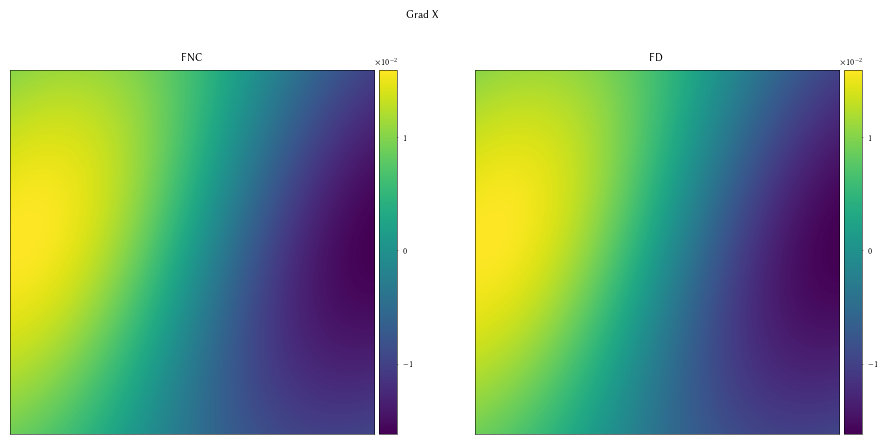

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[11, 5])
plot_image(grad_x[0], ax1)
ax1.set_title("FNC")
plot_image(image_fdx[0], ax2)
ax2.set_title("FD")
fig.suptitle("Grad X")

Mean:
-2.19464e-09
Variance:
1.7742502e-13


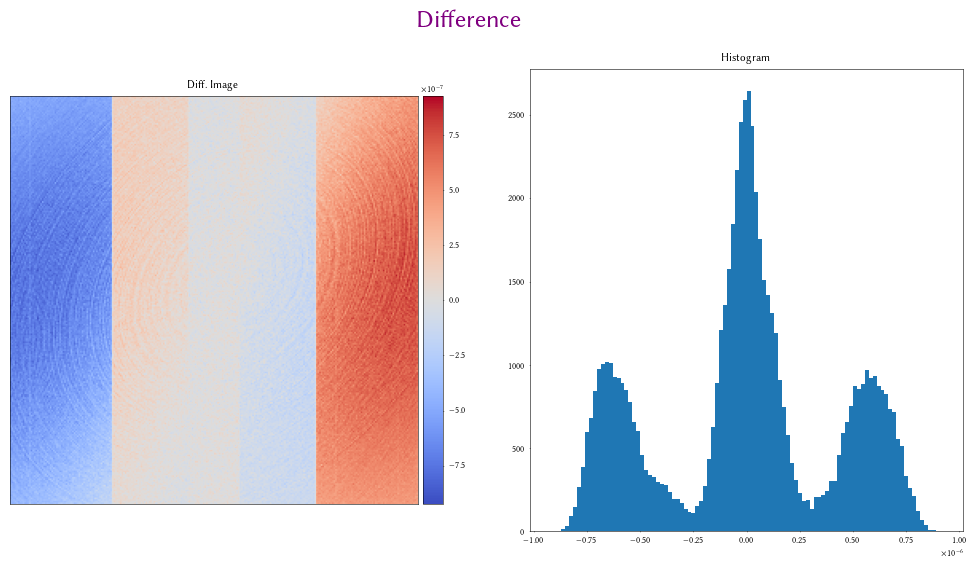

In [8]:
sketch_diff(grad_x[0], image_fdx[0])

Text(0.5, 0.98, 'Grad Y')

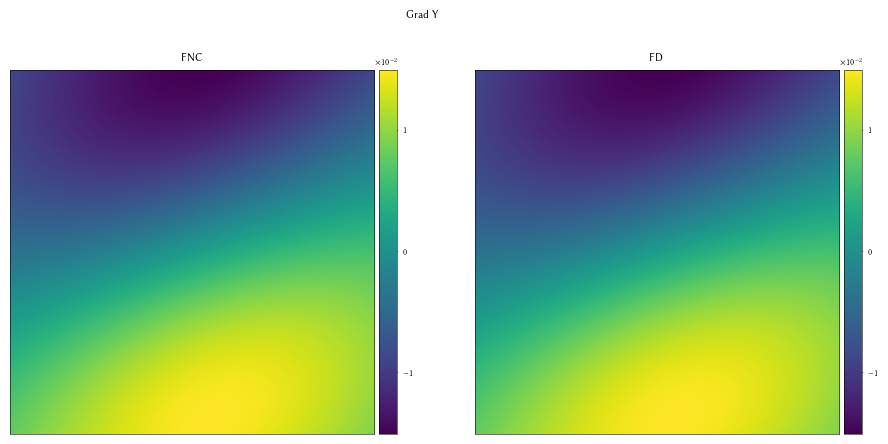

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[11, 5])
plot_image(grad_y[0], ax1)
ax1.set_title("FNC")
plot_image(image_fdy[0], ax2)
ax2.set_title("FD")
fig.suptitle("Grad Y")

Mean:
-3.0616079e-09
Variance:
1.522027e-13


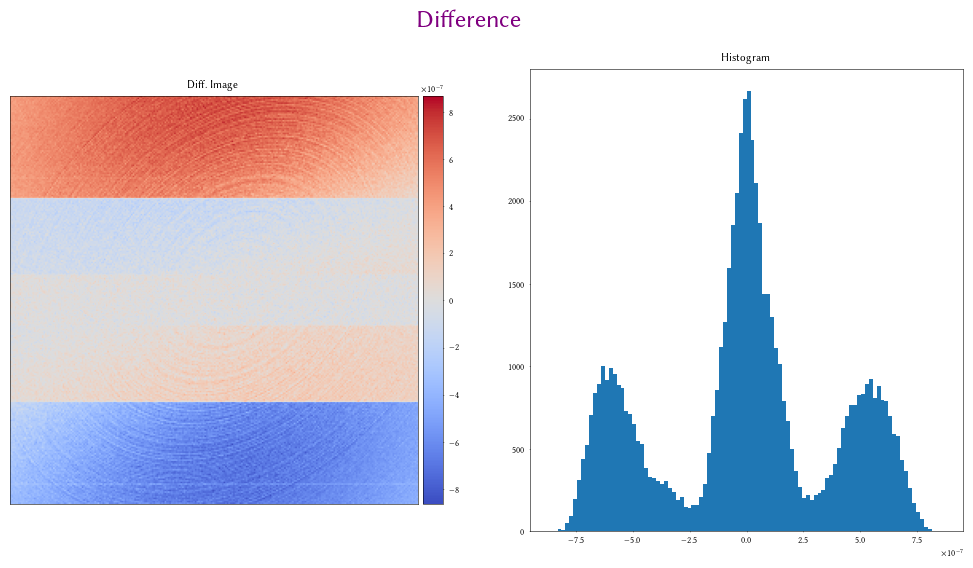

In [12]:
sketch_diff(grad_y[0], image_fdy[0])

Text(0.5, 0.98, 'Laplacian')

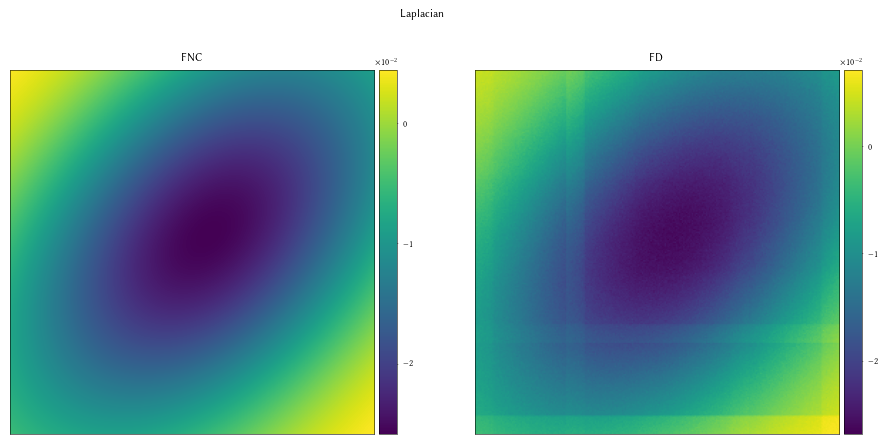

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[11, 5])
plot_image(laplacian_fnc_im[0], ax1)
ax1.set_title("FNC")
plot_image(laplacian_fd_im[0], ax2)
ax2.set_title("FD")
fig.suptitle("Laplacian")

Mean:
0.00028345862
Variance:
5.0693166e-07


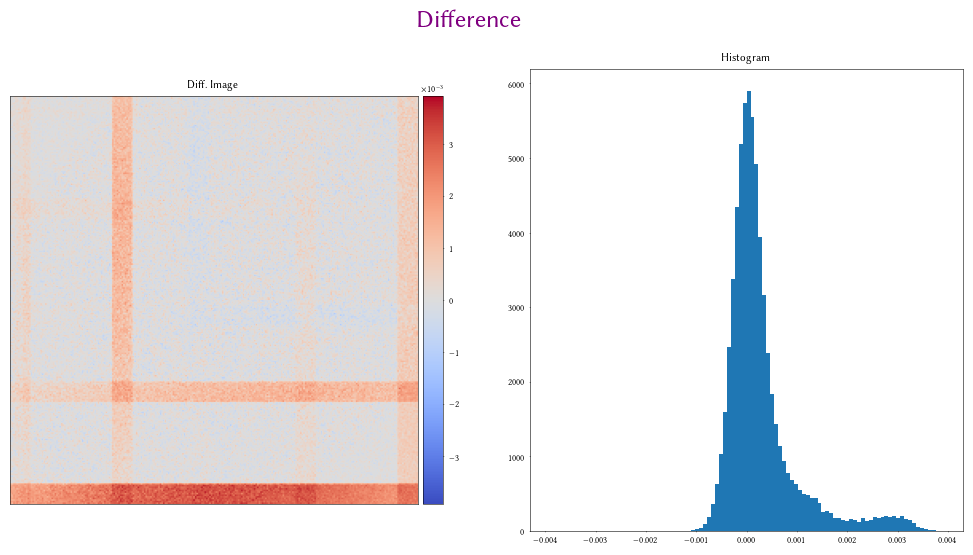

In [14]:
sketch_diff(laplacian_fd_im[0], laplacian_fnc_im[0])